Below various libraries are imported

% matplotlib inline is a magic function so that graphs are displayed within the notebook 
* Matplotlib is for plotting 
* Numpy is for multidimensional arrays and matricies 
* Pandas is for data manipulation and analysis
* Pymc3 is for Bayesian statistical modeling
* Seaborn is another plotting/visualization package based on matplotlib and is used mainly for stat visualization 

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns

In [2]:
# Initialize i as second year. Doing this for while loop below 
i = 1982
# avgMonth will end up holding the averages for each month over the 37 years
avgMonth = []
JanuaryData = []
DecemberData = []
# regYrStart and end are lists that determine where to slice the dataframe in order to average each month's data
regYrStart = [0,31,59,90,120,151,181,212,243,273,304,334]
regYrEnd = [31,59,90,120,151,181,212,243,273,304,334,365]
# leapYrStart and end are lists that are used when leap years occur (9 times over the 37 years)
leapYrStart = [0,31,60,91,121,152,182,213,244,274,305,335]
leapYrEnd = [31,60,91,121,152,182,213,244,274,304,334,365]

In [3]:
""" I'm using read_table to convert the data into a pandas dataframe
In this case x will be the data for the year 1981
The first paramter is the location of the data, the second is how to seperate the data, which in this case is 
separated by |.
The final parameter is telling pandas to skip the first 3 rows of the data since the labels are not needed
"""
x = pd.read_table("ftp://ftp.cpc.ncep.noaa.gov/htdocs/degree_days/weighted/daily_data/1981/Population.Heating.txt", delimiter="|", skiprows=[0,1,2])
# Below I am changing the region column as the index instead of the standard 0, 1, ... n
x = x.set_index('Region')

In [4]:
# Let's look over the first year's dataframe. It has 365 columns which is good since this year is not a leap year
x

,19810101,19810102,19810103,19810104,19810105,19810106,19810107,19810108,19810109,19810110,...,19811222,19811223,19811224,19811225,19811226,19811227,19811228,19811229,19811230,19811231
Region,,,,,,,,,,,,,,,,,,,,,
1,51,46,55,66,62,51,42,51,58,53,...,40,32,31,34,39,37,36,32,38,44
2,45,42,50,59,56,47,42,51,56,52,...,38,25,28,32,36,34,32,30,37,39
3,36,43,51,62,59,48,49,57,55,57,...,34,36,41,41,36,35,38,45,48,39
4,33,40,46,55,47,39,47,48,48,54,...,36,44,44,42,39,41,47,53,48,44
5,24,23,26,27,34,31,23,30,31,31,...,21,9,12,16,20,19,18,16,21,22
6,24,29,28,30,42,36,32,39,35,37,...,20,15,27,29,24,21,20,22,30,26
7,14,17,17,18,22,18,19,20,18,18,...,6,16,23,26,20,16,13,19,20,16
8,22,22,23,23,24,26,26,28,28,27,...,29,38,38,33,33,32,35,33,29,29
9,14,16,14,15,14,15,17,18,17,16,...,21,22,21,20,19,19,21,21,19,20


In [5]:
jan_range = range(0,31)
dec_rangeReg = range(334,365)
dec_rangeLeap = range(335,366)
for k in jan_range:
    JanuaryData.append(x.iloc[9,k])
for k in dec_rangeReg:
    DecemberData.append(x.iloc[9,k])

In [6]:
""" The year 1981 is not a leap year so I'm going to slice over the dataframe for each month using the regular 
year slices and average each month before playing the average into the avgMonth list. 
iloc is used for integer based slicing and since I only care about the mean CONUS data, I'm doing to keep only 
the last row (ie 9). j and k are taken from regYrStart and regYrEnd in order to gather the data for each month 
"""
for j, k in zip(regYrStart, regYrEnd):
            z = x.iloc[9,j:k]
            avgMonth.append(z.mean())

In [7]:
# I've loop up the 9 leap years and placed them in a list
leapYears = [1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]
"""
Now I'm using a while loop to add the rest of the years (1982-2017) to the dataframe and this will be called
result. Also, I've included a for loop to gather the rest of the months' averages with a nested loop statment 
to keep track of the leap years
"""
while(i < 2018):
    # Gather year data from site and convert it into a dataframe like before 
    y = pd.read_table("ftp://ftp.cpc.ncep.noaa.gov/htdocs/degree_days/weighted/daily_data/%d/Population.Heating.txt" %(i), delimiter="|", skiprows=[0,1,2])
    # set the index as the region column like I did before
    y = y.set_index('Region')
    """The pandas concat feature will join the first dataframe (for the first iteration result will contain
    1981 and 1982. Each successive iteration will add the subsequent year to the dataframe. Axis = 1 means the
    dataframe will be joined along the columns versus axis = 0, which joins the two dataframes by the index
    """
    result = pd.concat([x,y], axis=1)
    x = result
    if(i in leapYears):
        for j, k in zip(leapYrStart, leapYrEnd):
            z = y.iloc[9,j:k]
            avgMonth.append(z.mean()) 
        for k in jan_range:
            JanuaryData.append(y.iloc[9,k])
        for k in dec_rangeLeap:
            DecemberData.append(y.iloc[9,k])
    else:
        for j, k in zip(regYrStart, regYrEnd):
            z = y.iloc[9,j:k]
            avgMonth.append(z.mean())
        for k in jan_range:
            JanuaryData.append(y.iloc[9,k])
        for k in dec_rangeReg:
            DecemberData.append(y.iloc[9,k])
    i += 1

In [8]:
print(JanuaryData)

[28, 29, 33, 37, 38, 33, 31, 36, 37, 36, 39, 41, 38, 33, 30, 32, 34, 33, 28, 26, 26, 27, 25, 25, 24, 22, 22, 25, 28, 31, 33, 27, 29, 28, 25, 27, 28, 29, 35, 37, 44, 48, 45, 41, 39, 38, 38, 44, 42, 33, 29, 29, 32, 31, 33, 35, 35, 35, 30, 28, 26, 25, 29, 28, 29, 31, 28, 24, 22, 22, 24, 22, 21, 26, 29, 27, 27, 31, 32, 35, 37, 37, 34, 30, 26, 25, 26, 28, 29, 28, 26, 24, 24, 34, 30, 28, 25, 23, 23, 25, 28, 27, 29, 35, 38, 36, 34, 36, 38, 37, 38, 42, 46, 47, 43, 34, 27, 22, 23, 24, 26, 26, 26, 29, 23, 26, 31, 32, 30, 29, 27, 30, 34, 34, 35, 38, 36, 33, 34, 36, 33, 31, 33, 43, 49, 42, 36, 32, 30, 35, 35, 33, 34, 34, 35, 27, 26, 23, 25, 28, 31, 34, 37, 33, 26, 25, 24, 26, 32, 32, 27, 21, 16, 17, 20, 21, 21, 25, 27, 26, 27, 34, 38, 33, 30, 27, 28, 28, 28, 28, 29, 27, 24, 26, 28, 27, 28, 28, 25, 23, 23, 27, 32, 31, 30, 32, 33, 33, 36, 39, 36, 35, 35, 32, 28, 24, 25, 31, 33, 34, 33, 39, 42, 43, 41, 39, 39, 38, 33, 31, 37, 36, 30, 25, 23, 23, 24, 26, 30, 31, 29, 29, 34, 36, 33, 28, 22, 18, 27, 26,

In [10]:
print("January")
H = np.asarray(JanuaryData)
print(H.mean())
print("December")
J = np.asarray(DecemberData)
print(J.mean())

January
28.3121185702
December
25.6669572799


In [11]:
print(DecemberData)

[23, 20, 21, 22, 24, 24, 21, 19, 24, 28, 28, 27, 27, 27, 27, 28, 30, 33, 37, 37, 32, 26, 24, 27, 28, 28, 26, 27, 28, 31, 29, 14, 11, 11, 11, 12, 14, 20, 23, 26, 29, 28, 32, 35, 30, 24, 21, 25, 27, 26, 25, 25, 23, 20, 17, 16, 17, 21, 19, 24, 31, 31, 26, 26, 24, 23, 23, 23, 26, 28, 26, 23, 21, 22, 21, 21, 23, 28, 31, 34, 38, 40, 39, 37, 41, 46, 51, 47, 39, 34, 36, 42, 39, 21, 22, 24, 28, 30, 30, 33, 28, 23, 21, 19, 19, 18, 19, 19, 18, 18, 20, 22, 22, 21, 21, 24, 25, 27, 29, 23, 16, 13, 17, 22, 23, 27, 32, 29, 26, 27, 27, 25, 23, 24, 25, 27, 31, 35, 36, 32, 31, 34, 38, 37, 36, 34, 27, 26, 34, 40, 34, 32, 31, 30, 27, 23, 22, 21, 24, 26, 26, 24, 22, 22, 25, 29, 29, 32, 31, 25, 23, 22, 22, 24, 25, 27, 28, 27, 25, 23, 24, 26, 27, 27, 27, 26, 23, 24, 23, 22, 24, 24, 22, 20, 17, 16, 18, 20, 24, 26, 26, 29, 31, 31, 27, 22, 22, 24, 24, 24, 22, 25, 28, 28, 31, 35, 33, 24, 25, 21, 22, 24, 21, 19, 22, 27, 31, 33, 35, 32, 26, 25, 32, 35, 34, 28, 21, 20, 22, 22, 21, 24, 27, 27, 27, 32, 32, 28, 26, 26,

In [12]:
print(len(JanuaryData))

1147


In [13]:
print(len(DecemberData))

1147


In [14]:
# Should expect 444 months (12 * 37). It is so we're good here
print(len(avgMonth))

444


In [15]:
# Now let's see the result. I'm expecting 13514 columns (37 years * 365 days + 9 extra days due to leap years)
result

,19810101,19810102,19810103,19810104,19810105,19810106,19810107,19810108,19810109,19810110,...,20171222,20171223,20171224,20171225,20171226,20171227,20171228,20171229,20171230,20171231
Region,,,,,,,,,,,,,,,,,,,,,
1,51,46,55,66,62,51,42,51,58,53,...,40,32,32,34,43,53,59,59,57,59
2,45,42,50,59,56,47,42,51,56,52,...,31,25,30,33,43,49,54,53,50,55
3,36,43,51,62,59,48,49,57,55,57,...,29,32,41,47,58,62,60,54,54,60
4,33,40,46,55,47,39,47,48,48,54,...,39,45,47,55,61,64,57,54,62,68
5,24,23,26,27,34,31,23,30,31,31,...,12,7,12,20,21,22,27,26,24,29
6,24,29,28,30,42,36,32,39,35,37,...,9,9,22,33,31,35,37,33,32,39
7,14,17,17,18,22,18,19,20,18,18,...,9,19,19,24,23,28,28,23,19,27
8,22,22,23,23,24,26,26,28,28,27,...,36,33,34,30,32,29,26,24,27,30
9,14,16,14,15,14,15,17,18,17,16,...,23,20,18,17,17,15,13,11,12,15


In [16]:
# x_data will represent each month for the 444 months when I plot the averages for each month
x_data = range(1,445)
print(x_data)

range(1, 445)


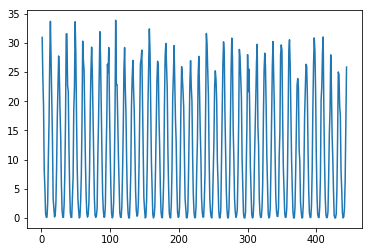

In [17]:
# Now I'm going to plot the data 
plt.plot(x_data, avgMonth);

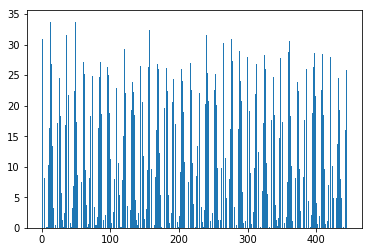

In [18]:
# Let's try a bar plot insted
plt.bar(x_data, avgMonth);

In [19]:
# In this case i is now we are going to use i agin for a different while loop.
# Having the average data for each month was good, but we can do better.
# How seeing the mean for each month over the 37 years
i = 0
monthList = []
meanList = []
# For the while loop we are going to calculate the mean for each month by using slices over the avgMonth list
while(i < 12):
    monthRange = range(i, 444,12)
    for j in monthRange:
        monthList.append(avgMonth[j])
    # We need to convert the list into a numpy array in order to take advanatage of its mean method
    monthArray = np.asarray(monthList)
    # using numpy's mean method
    monthMean = monthArray.mean()
    meanList.append(monthMean)
    # Clear monthList at the end in order to make sure the average is taken only over all the Jan months, etc.
    monthList = []
    i += 1

In [20]:
# Let's see the mean list. It should only have 12 balues in it, which it does. 
print(meanList)

[28.312118570183085, 25.371255491945149, 18.358326068003485, 10.62972972972973, 4.4176111595466434, 0.97027027027027024, 0.06625980819529205, 0.16129032258064516, 2.077477477477478, 8.1982563208369665, 17.039049394221809, 25.667916303400176]


In [21]:
# Make a months list so we can plot mean v month
months = ['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']

<Container object of 12 artists>

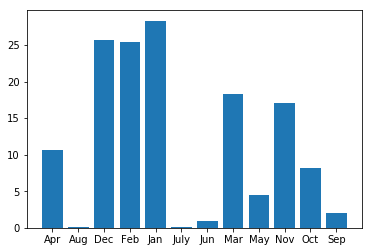

In [22]:
# Plot the mean v months
plt.bar(months, meanList)

# Let's look at the data from January 

In [23]:
JanList = []
JanRange = range(0,444,12)

In [24]:
for i in JanRange:
    JanList.append(avgMonth[i])
    JanArray = np.asarray(JanList)

In [25]:
print(JanArray)

[ 30.96774194  33.70967742  27.77419355  31.58064516  33.64516129
  27.06451613  29.29032258  31.93548387  24.93548387  22.87096774
  29.22580645  27.03225806  27.16129032  32.41935484  26.87096774
  29.93548387  29.5483871   24.09677419  26.96774194  27.70967742
  29.74193548  25.22580645  30.19354839  30.83870968  27.61290323
  21.64516129  26.74193548  28.25806452  30.25806452  29.67741935
  30.5483871   23.90322581  26.35483871  30.87096774  28.38709677
  27.96774194  24.58064516]


In [26]:
print(JanArray.mean())

28.3121185702


In [27]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=13, sd=20, testval=0)
    sd = pm.HalfNormal('sd', sd=1)
    n = pm.Normal('n', mu=mu, sd=sd, observed=JanArray)

    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 5500/5500 [00:04<00:00, 1318.13it/s]


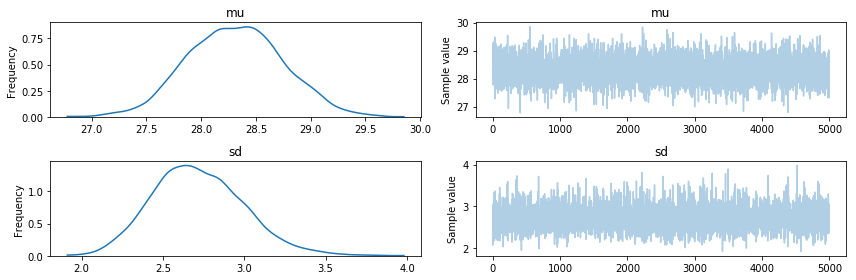

In [29]:
pm.traceplot(trace);

In [30]:
ppc = pm.sample_ppc(trace, samples=500, model=model, size=100)

100%|██████████| 500/500 [00:00<00:00, 2772.48it/s]


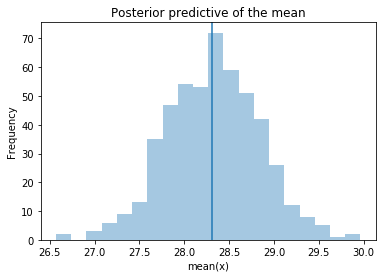

In [31]:
ax = plt.subplot()
sns.distplot([n.mean() for n in ppc['n']], kde=False, ax=ax)
ax.axvline(JanArray.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

In [32]:
pm.summary(trace);


mu:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  28.305           0.438            0.006            [27.468, 29.152]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  27.470         27.997         28.303         28.602         29.160


sd:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.719            0.278            0.004            [2.173, 3.245]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  2.224          2.522          2.701          2.898          3.313



In [33]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=50, sd=50, testval=0)
    sd = pm.HalfNormal('sd', sd=20)
    n = pm.Normal('n', mu=mu, sd=sd, observed=JanArray)

    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 5500/5500 [00:03<00:00, 1543.74it/s]


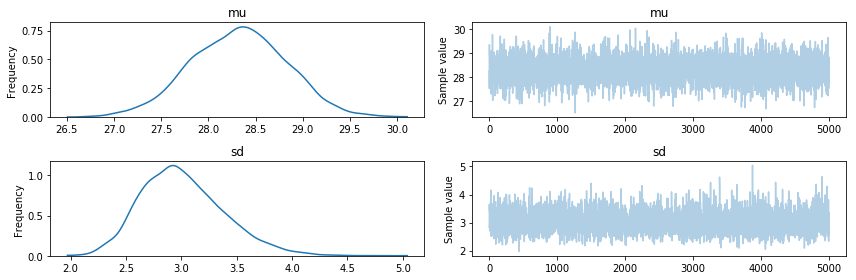

In [34]:
pm.traceplot(trace);

In [35]:
ppc = pm.sample_ppc(trace, samples=500, model=model, size=100)

100%|██████████| 500/500 [00:00<00:00, 2733.76it/s]


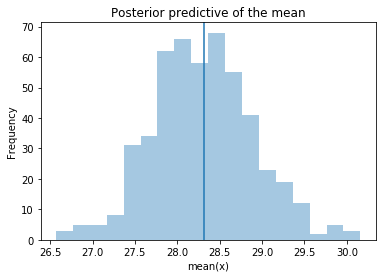

In [36]:
ax = plt.subplot()
sns.distplot([n.mean() for n in ppc['n']], kde=False, ax=ax)
ax.axvline(JanArray.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

In [37]:
pm.summary(trace);


mu:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  28.313           0.506            0.007            [27.363, 29.331]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  27.304         27.959         28.319         28.660         29.288


sd:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  3.009            0.371            0.006            [2.304, 3.730]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  2.367          2.741          2.969          3.239          3.827



In [38]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=50, sd=50)
    sd = pm.HalfNormal('sd', sd=20)
    n = pm.Normal('n', mu=mu, sd=sd, observed=JanArray)

    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 5500/5500 [00:03<00:00, 1574.65it/s]


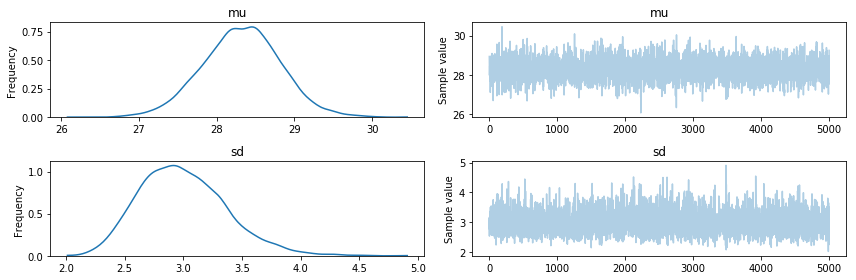

In [39]:
pm.traceplot(trace);

In [40]:
ppc = pm.sample_ppc(trace, samples=500, model=model, size=100)

100%|██████████| 500/500 [00:00<00:00, 2699.57it/s]


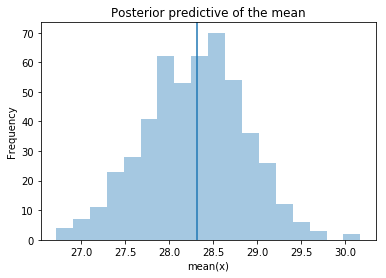

In [41]:
ax = plt.subplot()
sns.distplot([n.mean() for n in ppc['n']], kde=False, ax=ax)
ax.axvline(JanArray.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

In [42]:
pm.summary(trace);


mu:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  28.310           0.499            0.007            [27.296, 29.251]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  27.328         27.980         28.314         28.642         29.286


sd:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  3.001            0.366            0.006            [2.345, 3.746]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  2.384          2.736          2.968          3.230          3.808



In [43]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=50, sd=50, testval=0)
    sd = pm.Uniform('sd', lower=1, upper=20)
    n = pm.Normal('n', mu=mu, sd=sd, observed=JanArray)

    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 5500/5500 [00:04<00:00, 1369.22it/s]


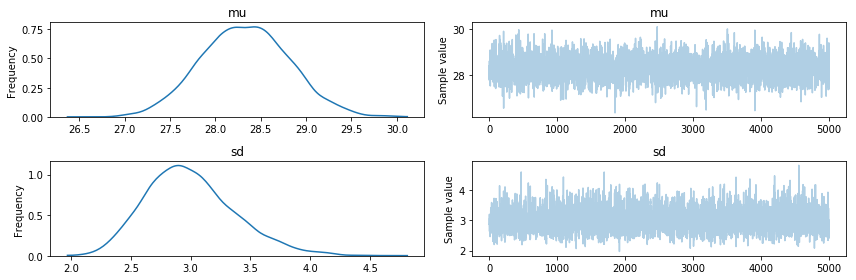

In [44]:
pm.traceplot(trace);

In [45]:
ppc = pm.sample_ppc(trace, samples=500, model=model, size=100)

100%|██████████| 500/500 [00:00<00:00, 2213.65it/s]


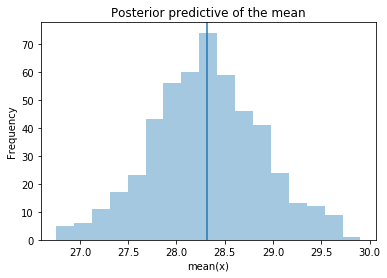

In [46]:
ax = plt.subplot()
sns.distplot([n.mean() for n in ppc['n']], kde=False, ax=ax)
ax.axvline(JanArray.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

In [47]:
pm.summary(trace);


mu:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  28.321           0.490            0.008            [27.371, 29.273]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  27.383         27.988         28.318         28.647         29.298


sd:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.995            0.373            0.005            [2.318, 3.738]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  2.364          2.731          2.957          3.213          3.821



(array([ 1.,  2.,  4.,  1.,  7.,  5.,  6.,  6.,  3.,  2.]),
 array([ 21.64516129,  22.8516129 ,  24.05806452,  25.26451613,
         26.47096774,  27.67741935,  28.88387097,  30.09032258,
         31.29677419,  32.50322581,  33.70967742]),
 <a list of 10 Patch objects>)

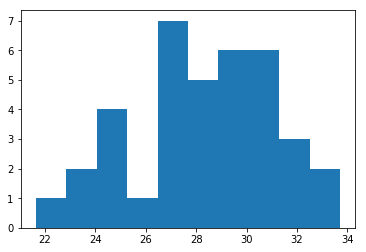

In [48]:
plt.hist(JanArray)

In [49]:
JanArray

array([ 30.96774194,  33.70967742,  27.77419355,  31.58064516,
        33.64516129,  27.06451613,  29.29032258,  31.93548387,
        24.93548387,  22.87096774,  29.22580645,  27.03225806,
        27.16129032,  32.41935484,  26.87096774,  29.93548387,
        29.5483871 ,  24.09677419,  26.96774194,  27.70967742,
        29.74193548,  25.22580645,  30.19354839,  30.83870968,
        27.61290323,  21.64516129,  26.74193548,  28.25806452,
        30.25806452,  29.67741935,  30.5483871 ,  23.90322581,
        26.35483871,  30.87096774,  28.38709677,  27.96774194,  24.58064516])

In [50]:
with pm.Model() as model:
    mu = pm.Uniform('mu', lower=0, upper=100)
    sd = pm.Uniform('sd', lower=1, upper=20)
    n = pm.Normal('n', mu=mu, sd=sd, observed=JanArray)

    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 5500/5500 [00:03<00:00, 1471.95it/s]


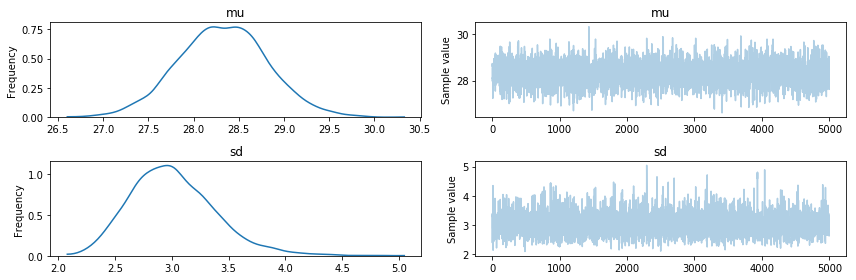

In [51]:
pm.traceplot(trace);

In [52]:
ppc = pm.sample_ppc(trace, samples=500, model=model, size=100)

100%|██████████| 500/500 [00:00<00:00, 2095.40it/s]


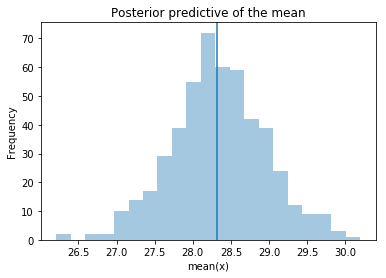

In [53]:
ax = plt.subplot()
sns.distplot([n.mean() for n in ppc['n']], kde=False, ax=ax)
ax.axvline(JanArray.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

In [54]:
pm.summary(trace);


mu:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  28.316           0.491            0.006            [27.342, 29.280]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  27.348         27.985         28.315         28.642         29.291


sd:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  3.015            0.377            0.006            [2.302, 3.742]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  2.390          2.752          2.980          3.240          3.872



(array([ 1.,  2.,  4.,  1.,  7.,  5.,  6.,  6.,  3.,  2.]),
 array([ 21.64516129,  22.8516129 ,  24.05806452,  25.26451613,
         26.47096774,  27.67741935,  28.88387097,  30.09032258,
         31.29677419,  32.50322581,  33.70967742]),
 <a list of 10 Patch objects>)

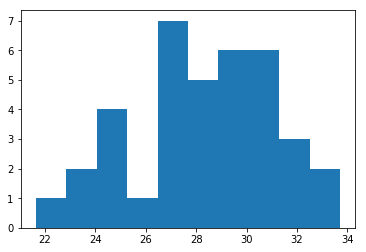

In [55]:
plt.hist(JanArray)

In [56]:
with pm.Model() as model:
    mu = pm.Uniform('mu', lower=0, upper=100)
    sd = pm.Uniform('sd', lower=1, upper=20)
    n = pm.Normal('n', mu=mu, sd=sd, observed=JanArray)

    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 5500/5500 [00:04<00:00, 1288.44it/s]


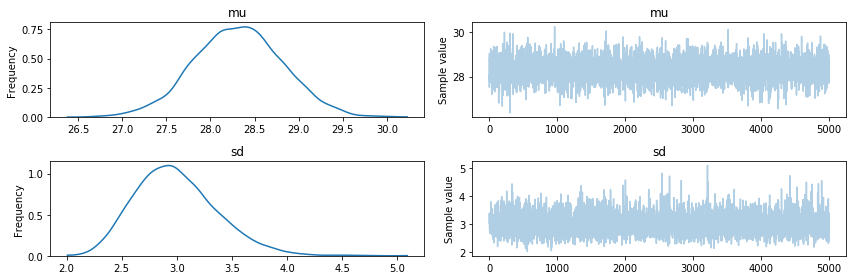

In [57]:
pm.traceplot(trace);

In [58]:
ppc = pm.sample_ppc(trace, samples=5000, model=model, size=100)

100%|██████████| 5000/5000 [00:01<00:00, 3184.22it/s]


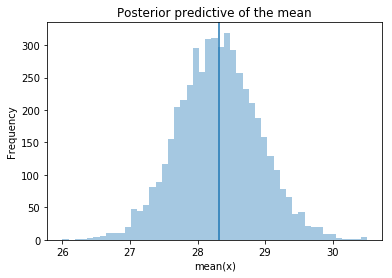

In [59]:
ax = plt.subplot()
sns.distplot([n.mean() for n in ppc['n']], kde=False, ax=ax)
ax.axvline(JanArray.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

In [60]:
pm.summary(trace);


mu:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  28.307           0.503            0.006            [27.283, 29.263]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  27.316         27.966         28.307         28.636         29.304


sd:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.997            0.371            0.005            [2.347, 3.755]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  2.375          2.733          2.962          3.221          3.818



In [62]:
# With full data
with pm.Model() as model:
    mu = pm.Uniform('mu', lower=0, upper=100)
    sd = pm.Uniform('sd', lower=1, upper=20)
    n = pm.Normal('n', mu=mu, sd=sd, observed=JanuaryData)

    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 5500/5500 [00:03<00:00, 1390.16it/s]


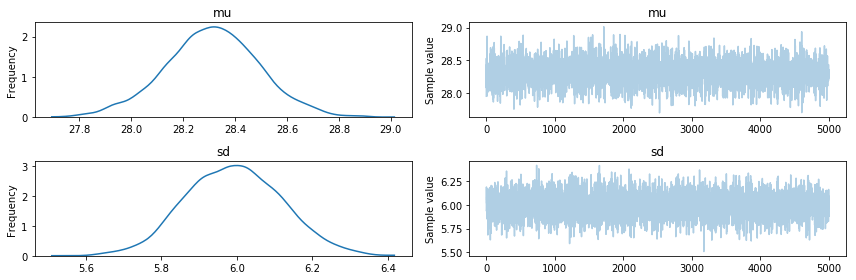

In [63]:
pm.traceplot(trace);

In [64]:
ppc = pm.sample_ppc(trace, samples=5000, model=model, size=100)

100%|██████████| 5000/5000 [00:02<00:00, 2427.95it/s]


In [65]:
JanuaryArray = np.asarray(JanuaryData)

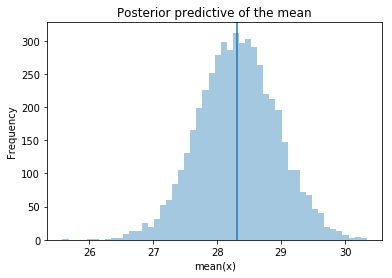

In [66]:
ax = plt.subplot()
sns.distplot([n.mean() for n in ppc['n']], kde=False, ax=ax)
ax.axvline(JanuaryArray.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

In [67]:
print(JanuaryArray.mean())

28.3121185702


In [72]:
# try it one more time
# With full data
with pm.Model() as model:
    mu = pm.Uniform('mu', lower=0, upper=100)
    sd = pm.Uniform('sd', lower=1, upper=20)
    n = pm.Normal('n', mu=mu, sd=sd, observed=JanuaryData)

    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 5500/5500 [00:04<00:00, 1334.69it/s]


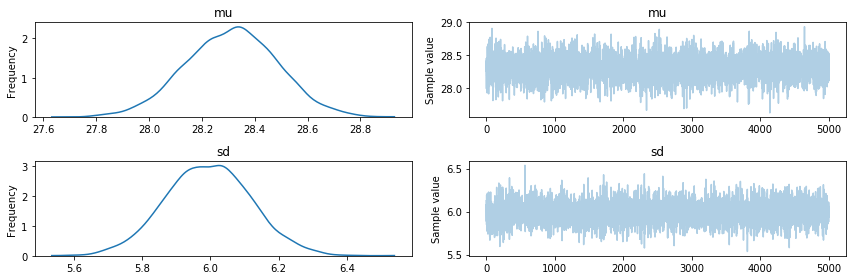

In [73]:
pm.traceplot(trace);

In [74]:
ppc = pm.sample_ppc(trace, samples=5000, model=model, size=100)

100%|██████████| 5000/5000 [00:01<00:00, 2868.02it/s]


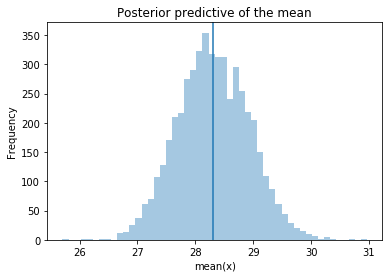

In [75]:
ax = plt.subplot()
sns.distplot([n.mean() for n in ppc['n']], kde=False, ax=ax)
ax.axvline(JanuaryArray.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');